226.34140154512335 [15.06694099  9.3774513 ]


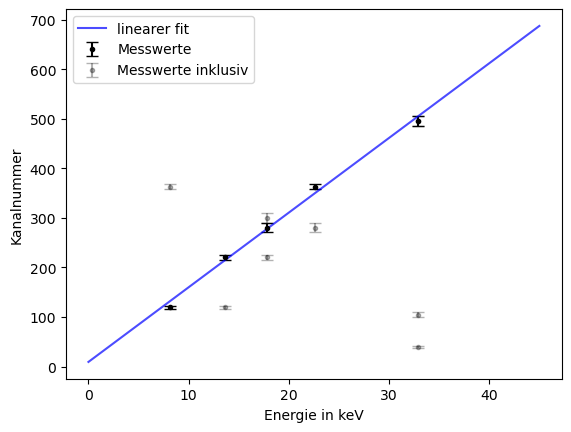

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#erste messung
# Ag 22.6 keV
Ag_max = 363
Ag_err = 5

# Cu 8.15 keV
Cu_max = 120
Cu_err = 3

# Rb 13.6 keV
Rb_max_1 = 300
Rb_err_1 = 10
Rb_max_2 = 221
Rb_err_2 = 5

# Mo 17.8 keV
Mo_max = 280
Mo_err = 9

# Ba 32.9 keV
Ba_weirdpeak1 = 40
Ba_weirdpeak1_err = 2
Ba_weirdpeak2 = 105
Ba_weirdpeak2_err = 5
Ba_max = 495
Ba_err = 10

# Tb 45.5 keV
# Tb_max = NaN
# Tb_err 

values_y = [Cu_max, Rb_max_2, Mo_max, Ag_max, Ba_max]
values_y_inclusive = [Ag_max, Cu_max,Rb_max_1, Rb_max_2, Mo_max, Ba_weirdpeak1, Ba_weirdpeak2, Ba_max]
values_y_err = [Cu_err, Rb_err_2, Mo_err, Ag_err, Ba_err]
values_y_inclusive_err = [Ag_err, Cu_err, Rb_err_1, Rb_err_2, Mo_err, Ba_weirdpeak1_err, Ba_weirdpeak2_err, Ba_err]
values_x = [8.15, 13.6, 17.8, 22.6, 32.9]
values_x_inclusive = [8.15, 13.6, 17.8, 17.8, 22.6, 32.9, 32.9, 32.9]

def linear(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear, values_x, values_y, p0 = [1,1])
 

x_dummy = np.linspace(0, 45, 100)

fig, ax = plt.subplots()
ax.errorbar(values_x, values_y, yerr=values_y_err, fmt='.k', label='Messwerte', capsize = 4)
ax.errorbar(values_x_inclusive, values_y_inclusive, yerr=values_y_inclusive_err, fmt='.k', label='Messwerte inklusiv', capsize = 4, alpha=0.3)
ax.plot(x_dummy, linear(x_dummy, *popt), 'b-', label='linearer fit', alpha=0.7)
print(linear(14.4, *popt), popt)
ax.set_xlabel('Energie in keV')
ax.set_ylabel('Kanalnummer')

ax.legend()


# Fehler geschwindigkeiten: 0.055 mm/s bzw 1% der geschwindigkeit


In [31]:
alpha_Eisenoxid_Fe2_O3_peaks_mmps = np.array([-8.528, -5.259, -1.703, 0.9072, 4.5043, 8.2303])
alpha_Eisenoxid_Fe2_O3_peaks_mmps_err = [0.0084, 0.0136, 0.00538, 0.05185, 0.0119, 0.00826]


E_0=14.41*1.602*10**(-16)
c=299792458
mu_g=0.09044*5.05*10**(-27)
e=1.602*10**(-19)
Q = 0.21*10**(-28)
Ergebnis=np.array(E_0/c*alpha_Eisenoxid_Fe2_O3_peaks_mmps*10**(-3))


from sympy import symbols, Eq, solve
mu_a, B, IS, Vzz = symbols('mu_a B IS Vzz')

eq1 = Eq((-mu_a*1+mu_g)*B + e*Q*Vzz/4 + IS,Ergebnis[0])
eq2 = Eq((-mu_a/3+mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[1])
eq3 = Eq((mu_a/3+mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[2])
eq4 = Eq((-mu_a/3-mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[3])
# # eq5 = Eq((-mu_a*(-1/2)/(3/2)  +   mu_g*(-1/2)/(1/2))*B + e*Q*Vzz/4 + IS,Ergebnis[4])
eq6 = Eq((mu_a-mu_g)*B + e*Q*Vzz/4 + IS,Ergebnis[5])

lsg = solve((eq1, eq2, eq3, eq6), (mu_a, B, IS, Vzz))
print(lsg)

[(-8.00011542288557e-28, -51.3407901255602, -2.25117308554840e-27, 1.31382002056013e+21)]


In [32]:
E_0=14.41*10**3
dicke_in_mg_Fe57_pro_mm2 = [0.05, 0.1, 0.25, 0.35, 1, 2]
linienbreiten = [0.1704, 0.217, 0.3516, 0.3763, 0.4621, 0.5537]
linienbreiten_err = [0.02613, 0.02152, 0.02188, 0.01976, 0.01754, 0.0234]
linienbreiten = E_0*np.array(linienbreiten)*10**(-3)/c
linienbreiten_err = E_0*np.array(linienbreiten_err)*10**(-3)/c
linienbreiten_err= np.array(linienbreiten_err) + 0.03*np.array(linienbreiten)
planck_h = 4.135667696*10**-15 # eV s
linienbreiten= linienbreiten/planck_h
linienbreiten_err= linienbreiten_err/planck_h

# Konversion der Linienbreiten von Hz in MHz
linienbreiten = linienbreiten*10**(-6)
linienbreiten_err = linienbreiten_err*10**(-6)

natuerliche Linienbreite in MHz: 0.8404690813610738
[1.98046528 2.52207139 4.086453   4.37352749 5.3707336  6.43534991]


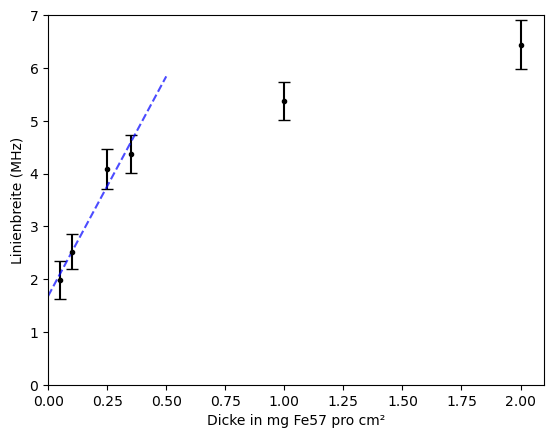

In [33]:
def linear(x, Gamma_0_lin, d):
    return 2*Gamma_0_lin*(1+0.134*d*x)

fig, ax = plt.subplots()
ax.errorbar(dicke_in_mg_Fe57_pro_mm2, linienbreiten, yerr=linienbreiten_err, fmt='.k', capsize = 4)
ax.set_xlabel('Dicke in mg Fe57 pro cm²')
ax.set_ylabel('Linienbreite (MHz)')
popt, pcov = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:4], linienbreiten[:4], p0 = [1,1])
dummy_dicke = np.linspace(0, 0.5, 100)
ax.plot(dummy_dicke, linear(dummy_dicke, *popt), 'b--', label='linearer fit', alpha=0.7)
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 7)

print(f'natuerliche Linienbreite in MHz: {linear(0, *popt)/2}')
print(linienbreiten)

natuerliche Linienbreite in MHz: 0.8410850644013902 +- 0.1626821087505982


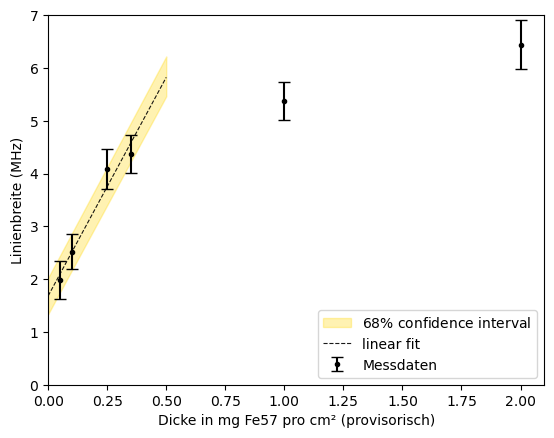

In [34]:
# Upper limit estimate
# Still bad

fig, ax = plt.subplots()
ax.errorbar(dicke_in_mg_Fe57_pro_mm2, linienbreiten, yerr=linienbreiten_err, fmt='.k', capsize = 4 , label='Messdaten')
ax.set_xlabel('Dicke in mg Fe57 pro cm² (provisorisch)')
ax.set_ylabel('Linienbreite (MHz)')
popt, pcov = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:4], linienbreiten[:4], sigma=linienbreiten_err[:4], absolute_sigma=True, p0 = [1,1])
popt_upper, pcov_upper = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:4], linienbreiten[:4]+linienbreiten_err[:4], p0 = [1,1])
popt_lower, pcov_lower = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:4], linienbreiten[:4]-linienbreiten_err[:4], p0 = [1,1])
dummy_dicke = np.linspace(0, 0.5, 100)
ax.fill_between(dummy_dicke, linear(dummy_dicke, *popt_upper), linear(dummy_dicke, *popt_lower), color='gold', alpha = 0.3, label=f'$68\%$ confidence interval')
ax.plot(dummy_dicke, linear(dummy_dicke, *popt), 'k--', linewidth=0.8, label='linear fit', alpha=0.9)
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 7)
print(f'natuerliche Linienbreite in MHz: {popt[0]} +- {pcov[0,0]**0.5}')
ax.legend( loc = 'lower right')

natuerliche Linienbreite in MHz: 1.1409376580646102 +- 0.13185717966415803


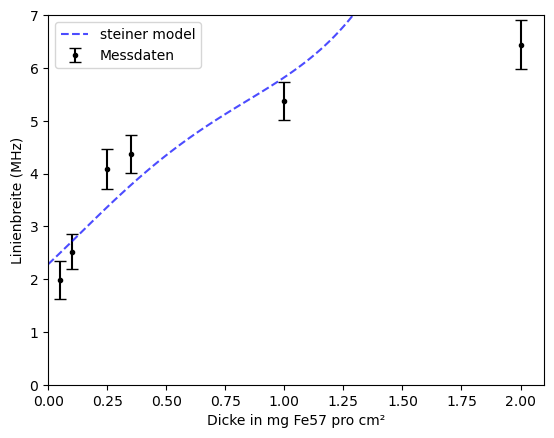

In [35]:
# Estimate with better fit function

def model_steiner(x, Gamma_0, param_1):
    return 2* Gamma_0 *(1+ 0.1306*param_1*x+ 0.00365*(x*param_1)**2 - 0.00074*(x*param_1)**3 + 0.000027*(x*param_1)**4)


fig, ax = plt.subplots()
ax.errorbar(dicke_in_mg_Fe57_pro_mm2, linienbreiten, yerr=linienbreiten_err, fmt='.k', capsize = 4, label='Messdaten')
ax.set_xlabel('Dicke in mg Fe57 pro cm²')
ax.set_ylabel('Linienbreite (MHz)')
popt, pcov = curve_fit(model_steiner, dicke_in_mg_Fe57_pro_mm2[:5], linienbreiten[:5], sigma=linienbreiten_err[:5], absolute_sigma=True, p0=[1.1, 1])
dummy_dicke = np.linspace(0, 2, 100)
ax.plot(dummy_dicke, model_steiner(dummy_dicke, *popt), 'b--', label='steiner model', alpha=0.7)
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 7)
ax.legend()

print(f'natuerliche Linienbreite in MHz: {popt[0]} +- {pcov[0,0]**0.5}')

In [36]:
# dominante fehlequellen aufschreiben: Geschwindigkeitsfehler, fehler aus fits
# 